In [ ]:
#Update paths & load required packages
path2analysis = '/script_dir/'
path2data = '/data_dir/'
path2raw = '/raw_csv_data_dir/'
path2clean = '/desired_output_dir/'
import os, re, sys, decimal, glob, math
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import all data files
##Example file name: 'Gambles_moodratings_subjXXXX_runX.csv'
files = ! ls /"Path to Data Dir"/

df = pd.DataFrame()
for file in files:
    print(file.split('.')[0].split('_'))
    SubjectID = file.split('.')[0].split('_')[2]
    RunNum = file.split('.')[0].split('_')[3]
    out = pd.read_csv(path2raw + file, header=None)
    out['SubjectID'] = SubjectID
    out['Run'] = RunNum
    df = pd.concat([out, df])

Example raw data output
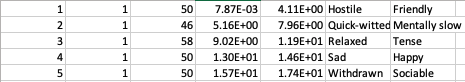

In [ ]:
#Rename column headers
df.columns = ["Trial", "Visit", "RawScore", "LeftPosition", "RightPosition", "LeftWord", "RightWord", "SubjectID", "Run"]

In [ ]:
#Check first ten rows of data for accuracy/completeness
df.head(10)

In [ ]:
#Create new variables with both positive and negative scoring (i.e. greater mood_pos = greater positive mood ratings)
df = df.reset_index(drop=True)
df['mood_pos'] = np.nan
df.loc[df.Trial == 1, 'mood_pos'] = df.RawScore
df.loc[df.Trial == 2, 'mood_pos'] = 100 - df.RawScore
df.loc[df.Trial == 3, 'mood_pos'] = 100 - df.RawScore
df.loc[df.Trial == 4, 'mood_pos'] = df.RawScore
df.loc[df.Trial == 5, 'mood_pos'] = df.RawScore

df['mood_neg'] = np.nan
df.loc[df.Trial == 1, 'mood_neg'] = 100 - df.RawScore
df.loc[df.Trial == 2, 'mood_neg'] = df.RawScore
df.loc[df.Trial == 3, 'mood_neg'] = df.RawScore
df.loc[df.Trial == 4, 'mood_neg'] = 100 - df.RawScore
df.loc[df.Trial == 5, 'mood_neg'] = 100 - df.RawScore

In [ ]:
#Create average positive and negative mood variables by run
df = df.reset_index(drop=True)
df['mean_mood_neg_1'] = np.nan
df['mean_mood_pos_1'] = np.nan
df.loc[df.Run == 'run1', 'mean_mood_neg_1'] = sum(df.mood_neg) / len(df.mood_neg)
df.loc[df.Run == 'run1', 'mean_mood_pos_1'] = sum(df.mood_pos) / len(df.mood_pos)

df['mean_mood_neg_2'] = np.nan
df['mean_mood_pos_2'] = np.nan
df.loc[df.Run == 'run2', 'mean_mood_neg_2'] = sum(df.mood_neg) / len(df.mood_neg)
df.loc[df.Run == 'run2', 'mean_mood_pos_2'] = sum(df.mood_pos) / len(df.mood_pos)

df['mean_mood_neg_3'] = np.nan
df['mean_mood_pos_3'] = np.nan
df.loc[df.Run == 'run3', 'mean_mood_neg_3'] = sum(df.mood_neg) / len(df.mood_neg)
df.loc[df.Run == 'run3', 'mean_mood_pos_3'] = sum(df.mood_pos) / len(df.mood_pos)

df['mean_mood_neg_4'] = np.nan
df['mean_mood_pos_4'] = np.nan
df.loc[df.Run == 'run4', 'mean_mood_neg_4'] = sum(df.mood_neg) / len(df.mood_neg)
df.loc[df.Run == 'run4', 'mean_mood_pos_4'] = sum(df.mood_pos) / len(df.mood_pos)

df['mean_mood_neg_5'] = np.nan
df['mean_mood_pos_5'] = np.nan
df.loc[df.Run == 'run5', 'mean_mood_neg_5'] = sum(df.mood_neg) / len(df.mood_neg)
df.loc[df.Run == 'run5', 'mean_mood_pos_5'] = sum(df.mood_pos) / len(df.mood_pos)

In [ ]:
#Write data to .xlsx
outpath = os.path.join(path2clean, 'vams_clean.xlsx')
writer = pd.ExcelWriter(outpath, engine='xlsxwriter')
data.to_excel(writer, sheet_name='Sheet1',index = False)
writer.save()